# Experiment: Payoffs under Monte Carlo Simulation of Simple Learning Model

Runs a Monte Carlo simulation on the Simple Learning Model.

Reports average payoffs across MC steps.

Relies on the run_monte_carlo_simulation model method which returns a time series of averages at each simulation step.

In [1]:
cd ..

C:\Users\Mathew\Documents\Repositories\idr


In [11]:
from src.python import model
import numpy as np;
import matplotlib.pyplot as plt;

In [12]:
def mc_experiment(monte_carlo_steps, number_of_agents,
                  R, S,
                  T, P,
                  tag0_initial_ingroup_belief, tag0_initial_outgroup_belief,
                  tag1_initial_ingroup_belief, tag1_initial_outgroup_belief,
                  number_of_steps, rounds_per_step,
                  selection_intensity, perturbation_probability,
                  perturbation_scale, game_name,
                  initial_number_of_0_tags):
    
    payoffs = np.zeros(number_of_steps, dtype=float)
    payoffs_tag0 = np.zeros(number_of_steps, dtype=float) 
    payoffs_tag1 =np.zeros(number_of_steps, dtype=float)
    
    a_model = model.Model(number_of_agents,
                          R, S, 
                          T, P,
                          tag0_initial_ingroup_belief, tag0_initial_outgroup_belief,
                          tag1_initial_ingroup_belief, tag1_initial_outgroup_belief,
                          initial_number_of_0_tags)
    
    for m in range(monte_carlo_steps):
        returned_array = a_model.run_monte_carlo_simulation(number_of_steps, rounds_per_step,
                                                            selection_intensity, perturbation_probability,
                                                            perturbation_scale)
        
        payoffs += returned_array[0]
        payoffs_tag0 += returned_array[1]
        payoffs_tag1 += returned_array[2]
    
    payoffs = payoffs/ monte_carlo_steps
    payoffs_tag0 = payoffs_tag0/monte_carlo_steps
    payoffs_tag1 = payoffs_tag1/ monte_carlo_steps
   
    plt.plot(payoffs)
    plt.title("{}: Average Payoffs Across MC Steps".format(game_name))
    plt.xlabel("Simulation Time")
    plt.ylabel("Average Payoff")
    plt.show()
    
    plt.clf()

    plt.plot(payoffs_tag0, label="0")
    plt.plot(payoffs_tag1, label="1")
    plt.legend()
    plt.title("{}: Average Payoffs of Groups Across MC Steps".format(game_name))
    plt.xlabel("Simulation Time")
    plt.ylabel("Average Payoff")
    plt.show()

In [13]:
# Parameters
monte_carlo_steps = 10
number_of_agents = 10
tag0_initial_ingroup_belief = 1
tag0_initial_outgroup_belief = 0
tag1_initial_ingroup_belief = 1
tag1_initial_outgroup_belief = 0
number_of_steps = 1000
rounds_per_step = 100
selection_intensity = 0.1
perturbation_probability = 0.05
perturbation_scale = 0.05
initial_number_of_0_tags = 5

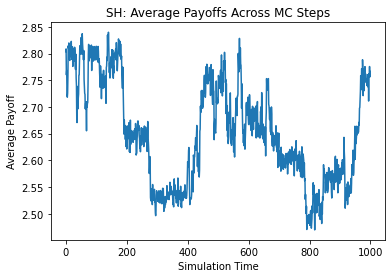

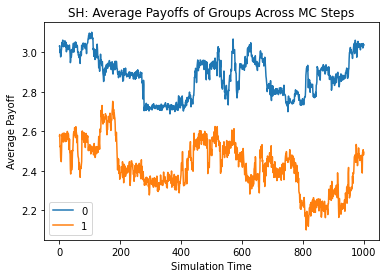

In [14]:
# MC on SH with initial beliefs, ingroup = 1.0 outgroup = 0.0
mc_experiment(monte_carlo_steps, number_of_agents,
              4, 1,
              3, 2,
              1.0, 0.0,
              1.0, 0.0,
              number_of_steps, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "SH",
              initial_number_of_0_tags)

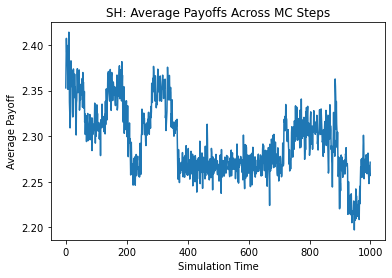

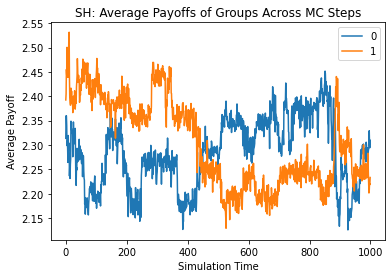

In [15]:
# MC on SH with initial beliefs, ingroup = 0.8 outgroup = 0.3
mc_experiment(monte_carlo_steps, number_of_agents,
              4, 1,
              3, 2,
              0.8, 0.3,
              0.8, 0.3,
              number_of_steps, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "SH",
              initial_number_of_0_tags)

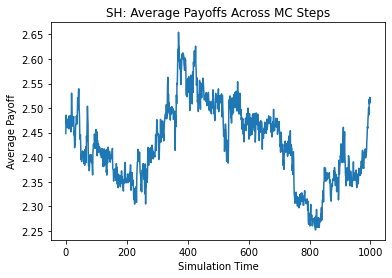

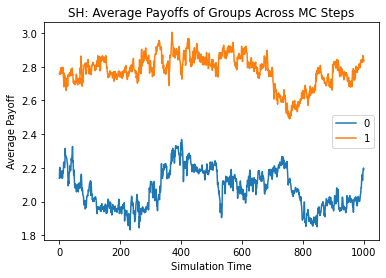

In [16]:
# MC on SH with initial beliefs, ingroup = 0.5 outgroup = 0.5
mc_experiment(monte_carlo_steps, number_of_agents,
              4, 1,
              3, 2,
              0.5, 0.5,
              0.5, 0.5,
              number_of_steps, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "SH",
              initial_number_of_0_tags)

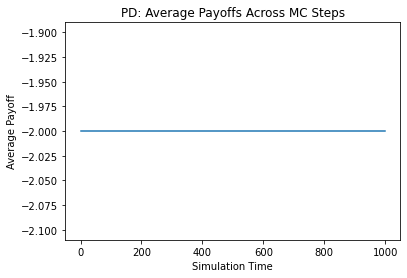

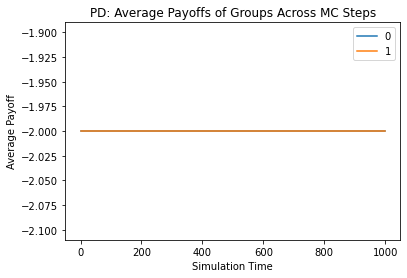

In [17]:
# MC on PD with initial beliefs, ingroup = 1.0 outgroup = 0.0
mc_experiment(monte_carlo_steps, number_of_agents,
              -1, -3,
              0, -2,
              1.0, 0.0,
              1.0, 0.0,
              number_of_steps, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "PD",
              initial_number_of_0_tags)

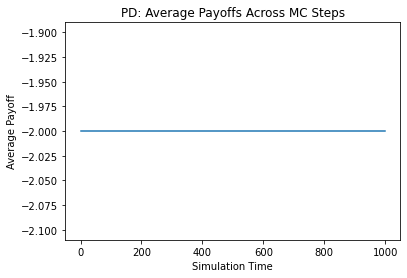

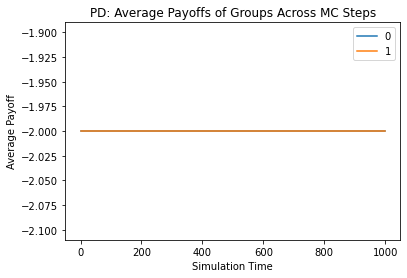

In [18]:
# MC on PD with initial beliefs, ingroup = 0.8 outgroup = 0.3
mc_experiment(monte_carlo_steps, number_of_agents,
              -1, -3,
              0, -2,
              0.8, 0.3,
              0.8, 0.3,
              number_of_steps, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "PD",
              initial_number_of_0_tags)

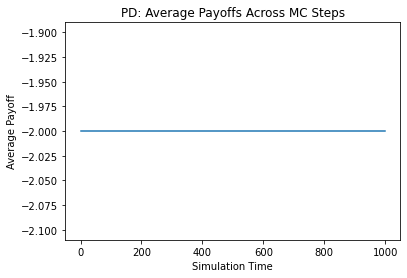

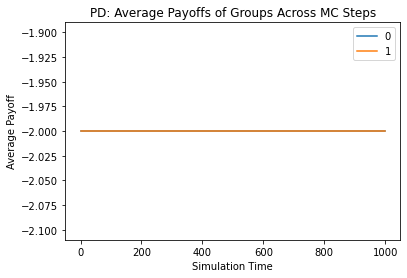

In [19]:
# MC on PD with initial beliefs, ingroup = 0.5 outgroup = 0.5
mc_experiment(monte_carlo_steps, number_of_agents,
              -1, -3,
              0, -2,
              0.5, 0.5,
              0.5, 0.5,
              number_of_steps, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "PD",
              initial_number_of_0_tags)

c:\python37\lib\site-packages\numba\core\ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'matching' of function 'permute'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src\python\model.py", line 8:
@jit(nopython=True)
def permute(matching, n):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


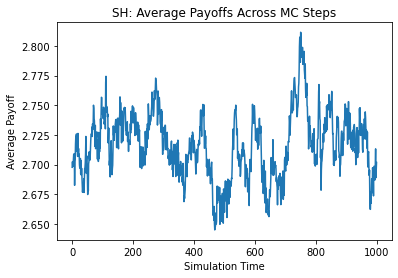

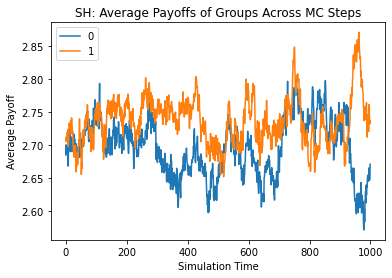

In [5]:
# MC (50 steps) on SH with initial beliefs, ingroup = 1 outgroup = 0
mc_experiment(50, number_of_agents,
              4, 1,
              3, 2,
              tag0_initial_ingroup_belief, tag0_initial_outgroup_belief,
              tag1_initial_ingroup_belief, tag1_initial_outgroup_belief,
              1000, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "SH",
              initial_number_of_0_tags)

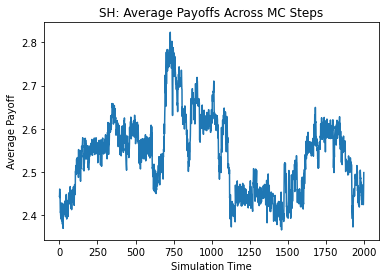

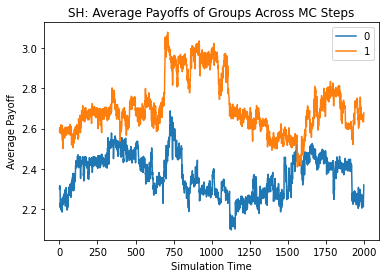

In [20]:
# MC on SH with initial beliefs, ingroup = 1.0 outgroup = 0.0, 2000 sim steps
mc_experiment(monte_carlo_steps, number_of_agents,
              4, 1,
              3, 2,
              1.0, 0.0,
              1.0, 0.0,
              2000, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "SH",
              initial_number_of_0_tags)

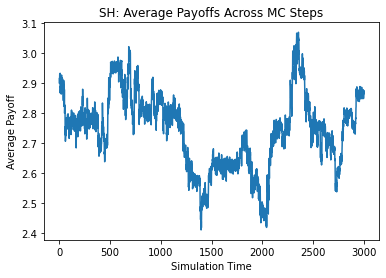

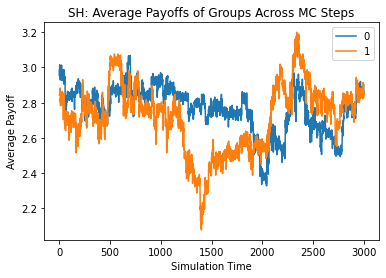

In [21]:
# MC on SH with initial beliefs, ingroup = 1.0 outgroup = 0.0, 3000 sim steps
mc_experiment(monte_carlo_steps, number_of_agents,
              4, 1,
              3, 2,
              1.0, 0.0,
              1.0, 0.0,
              3000, rounds_per_step,
              selection_intensity, perturbation_probability,
              perturbation_scale, "SH",
              initial_number_of_0_tags)

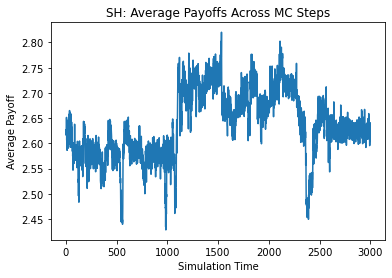

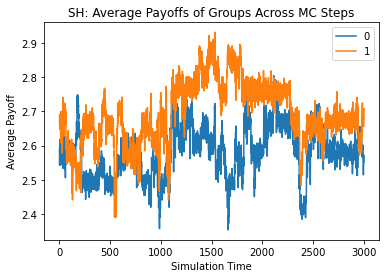

In [22]:
# MC on SH with initial beliefs, ingroup = 1.0 outgroup = 0.0, 3000 sim steps, 0.5 selection intensity
mc_experiment(monte_carlo_steps, number_of_agents,
              4, 1,
              3, 2,
              1.0, 0.0,
              1.0, 0.0,
              3000, rounds_per_step,
              0.5, perturbation_probability,
              perturbation_scale, "SH",
              initial_number_of_0_tags)

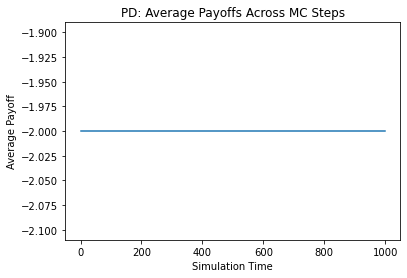

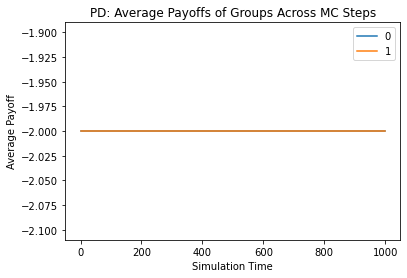

In [23]:
# MC on PD with initial beliefs, ingroup = 1.0 outgroup = 0.0, 3000 sim steps, 0.5 selection intensity
mc_experiment(monte_carlo_steps, number_of_agents,
              -1, -3,
              0, -2,
              1.0, 0.0,
              1.0, 0.0,
              number_of_steps, rounds_per_step,
              0.5, perturbation_probability,
              perturbation_scale, "PD",
              initial_number_of_0_tags)